<a href="https://colab.research.google.com/github/RylleLang/MANTARING_RYLLE_AIRO_CPE311N/blob/main/quizMidterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
rt_iot2022 = fetch_ucirepo(id=942)

# data (as pandas dataframes)
X = rt_iot2022.data.features
y = rt_iot2022.data.targets

# metadata
rt_iot2022.metadata

# variable information
z=rt_iot2022.variables



In [4]:
merge_datas = pd.concat([z, y, X], ignore_index = True, sort =False)

In [5]:
merge_datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246319 entries, 0 to 246318
Data columns (total 91 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   name                      85 non-null      object 
 1   role                      85 non-null      object 
 2   type                      85 non-null      object 
 3   demographic               0 non-null       object 
 4   description               0 non-null       object 
 5   units                     0 non-null       object 
 6   missing_values            85 non-null      object 
 7   Attack_type               123117 non-null  object 
 8   id.orig_p                 123117 non-null  float64
 9   id.resp_p                 123117 non-null  float64
 10  proto                     123117 non-null  object 
 11  service                   123117 non-null  object 
 12  flow_duration             123117 non-null  float64
 13  fwd_pkts_tot              123117 non-null  f

In [6]:
merge_datas.isnull().sum()

name                    246234
role                    246234
type                    246234
demographic             246319
description             246319
                         ...  
idle.avg                123202
idle.std                123202
fwd_init_window_size    123202
bwd_init_window_size    123202
fwd_last_window_size    123202
Length: 91, dtype: int64

In [7]:
X = merge_datas.drop(['Attack_type'],axis=1)
y = merge_datas['Attack_type']
X = pd.get_dummies(X)

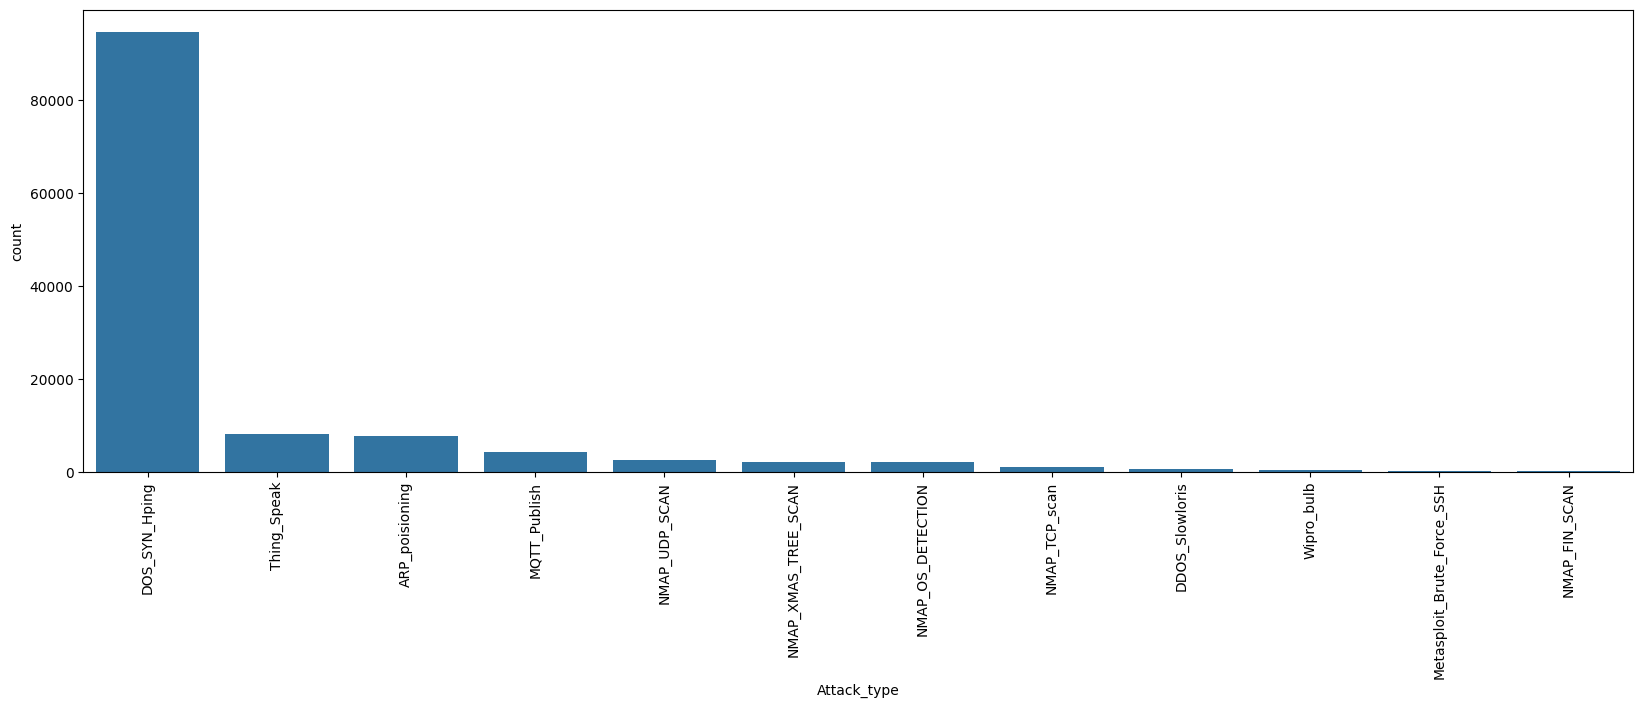

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  GridSearchCV

figure = plt.subplots(figsize=(20,6))
sns.countplot(data=merge_datas,x=merge_datas['Attack_type'],order=merge_datas['Attack_type'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [10]:
merge_datas.head()

,name,role,type,demographic,description,units,missing_values,Attack_type,id.orig_p,id.resp_p,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
0,id.orig_p,Feature,Integer,None,None,None,no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,id.resp_p,Feature,Integer,None,None,None,no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,proto,Feature,Categorical,None,None,None,no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,service,Feature,Continuous,None,None,None,no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,flow_duration,Feature,Continuous,None,None,None,no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


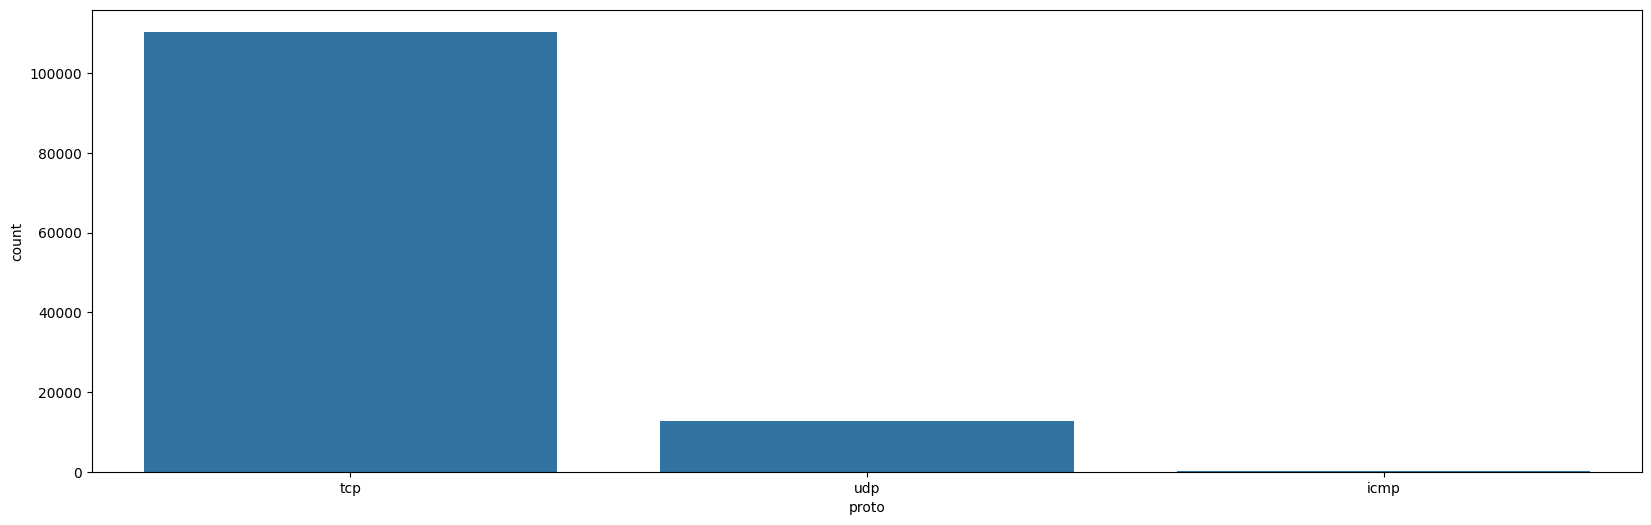

In [11]:
figure = plt.subplots(figsize=(20,6))
sns.countplot(data=merge_datas,x=merge_datas['proto'],order=merge_datas['proto'].value_counts().index)
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)
# Scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [17]:
from sklearn.neural_network import MLPClassifier

Mlp = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', random_state=42)
Mlp.fit(X, y)

y_pred = Mlp.predict(X)

ValueError: Input X contains NaN.
MLPClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [14]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_report_op = classification_report(y_test, y_pred)
print("\nClassification Report:\n", classification_report_op)

NameError: name 'y_pred' is not defined